# Loan Default Prediction Dataset

## Overview
This dataset is designed to help predict which individuals are most likely to default on their loan payments. It provides a valuable opportunity to tackle a significant machine learning problem within the financial services industry.

Companies, including big banks and financial institutions, leverage such data to decrease payment defaults and ensure timely loan repayments. By applying machine learning, organisations can identify high-risk individuals, allowing for the effective deployment of appropriate interventions.

The dataset originates from **Coursera's Loan Default Prediction Challenge**, offering a unique resource to test and enhance modelling skills.

---

## Columns
The dataset contains **18 distinct columns**, each providing specific details about the loan and the borrower:

| Column Name | Description | Range / Values |
| :--- | :--- | :--- |
| **LoanID** | A unique identifier for each loan. | Unique string/number |
| **Age** | The age of the borrower. | 18 to 69 |
| **Income** | The annual income of the borrower. | £15,000 to £150,000 |
| **LoanAmount** | The specific amount of money borrowed. | £5,000 to £250,000 |
| **CreditScore** | The credit score of the borrower. | 300 to 849 |
| **MonthsEmployed** | The number of months the borrower has been employed. | 0 to 119 months |
| **NumCreditLines** | The total number of open credit lines the borrower possesses. | 1 to 4 |
| **InterestRate** | The interest rate applied to the loan. | 2% to 25% |
| **LoanTerm** | The duration of the loan in months. | 12, 24, 36, 48, or 60 months |
| **DTIRatio** | The Debt-to-Income ratio. | 0.1 to 0.9 |
| **Education** | The highest level of education attained by the borrower. | `Bachelor's`, `High School`, `Other` |
| **EmploymentType** | The borrower's employment status. | `Part-time`, `Unemployed`, `Other` |
| **MaritalStatus** | The marital status of the borrower. | `Married`, `Divorced`, `Other` |
| **HasMortgage** | A boolean indicating whether the borrower has a mortgage. | `true` / `false` |
| **HasDependents** | A boolean indicating whether the borrower has dependents. | `true` / `false` |
| **LoanPurpose** | The stated purpose for which the loan was taken. | `Business`, `Home`, `Other` |
| **HasCoSigner** | A boolean indicating if the loan has a co-signer. | `true` / `false` |
| **Default** | **The target variable**, indicating whether the loan defaulted or not. | `0` (No) or `1` (Yes) |

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
DATA_PATH = os.path.join("..", "Data", "raw", "Loan_default.csv")
df = pd.read_csv(DATA_PATH)

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.drop(columns=['LoanID'],axis=1,inplace=True)

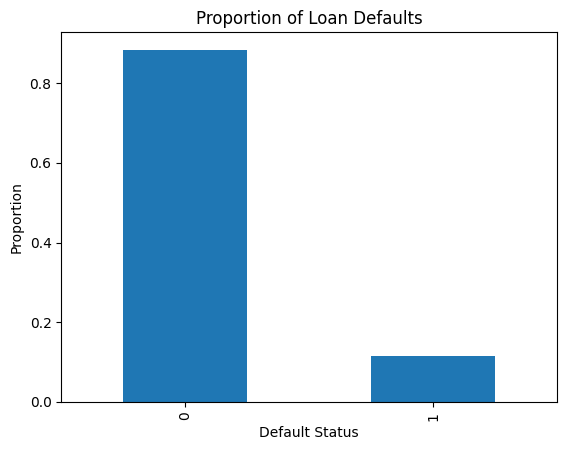

In [7]:
df['Default'].value_counts(normalize=True).plot(kind='bar')
plt.title('Proportion of Loan Defaults')
plt.xlabel('Default Status')
plt.ylabel('Proportion')
plt.show()
legend_labels = ['No Default', 'Default']

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
cat_df=df.select_dtypes(include=['object'])
cat_df.nunique()

Education         4
EmploymentType    4
MaritalStatus     3
HasMortgage       2
HasDependents     2
LoanPurpose       5
HasCoSigner       2
dtype: int64

In [10]:
cat_df.describe()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


In [11]:
unique_values = {col: cat_df[col].unique().tolist() for col in cat_df.columns}
unique_values

{'Education': ["Bachelor's", "Master's", 'High School', 'PhD'],
 'EmploymentType': ['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
 'MaritalStatus': ['Divorced', 'Married', 'Single'],
 'HasMortgage': ['Yes', 'No'],
 'HasDependents': ['Yes', 'No'],
 'LoanPurpose': ['Other', 'Auto', 'Business', 'Home', 'Education'],
 'HasCoSigner': ['Yes', 'No']}

In [12]:
num_df=list(set(df)-set(cat_df))
num_df=pd.DataFrame(df[num_df])
num_df.describe()

,NumCreditLines,LoanAmount,Age,Income,InterestRate,MonthsEmployed,DTIRatio,CreditScore,LoanTerm,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,2.501036,127578.865512,43.498306,82499.304597,13.492773,59.541976,0.500212,574.264346,36.025894,0.116128
std,1.117018,70840.706142,14.990258,38963.013729,6.636443,34.643376,0.230917,158.903867,16.969330,0.320379
min,1.000000,5000.000000,18.000000,15000.000000,2.000000,0.000000,0.100000,300.000000,12.000000,0.000000
25%,2.000000,66156.000000,31.000000,48825.500000,7.770000,30.000000,0.300000,437.000000,24.000000,0.000000
50%,2.000000,127556.000000,43.000000,82466.000000,13.460000,60.000000,0.500000,574.000000,36.000000,0.000000
75%,3.000000,188985.000000,56.000000,116219.000000,19.250000,90.000000,0.700000,712.000000,48.000000,0.000000
max,4.000000,249999.000000,69.000000,149999.000000,25.000000,119.000000,0.900000,849.000000,60.000000,1.000000


In [13]:
num_df.skew()

NumCreditLines   -0.000278
LoanAmount       -0.001827
Age               0.000698
Income           -0.000381
InterestRate      0.004608
MonthsEmployed   -0.002142
DTIRatio         -0.001499
CreditScore       0.004688
LoanTerm         -0.002178
Default           2.396377
dtype: float64

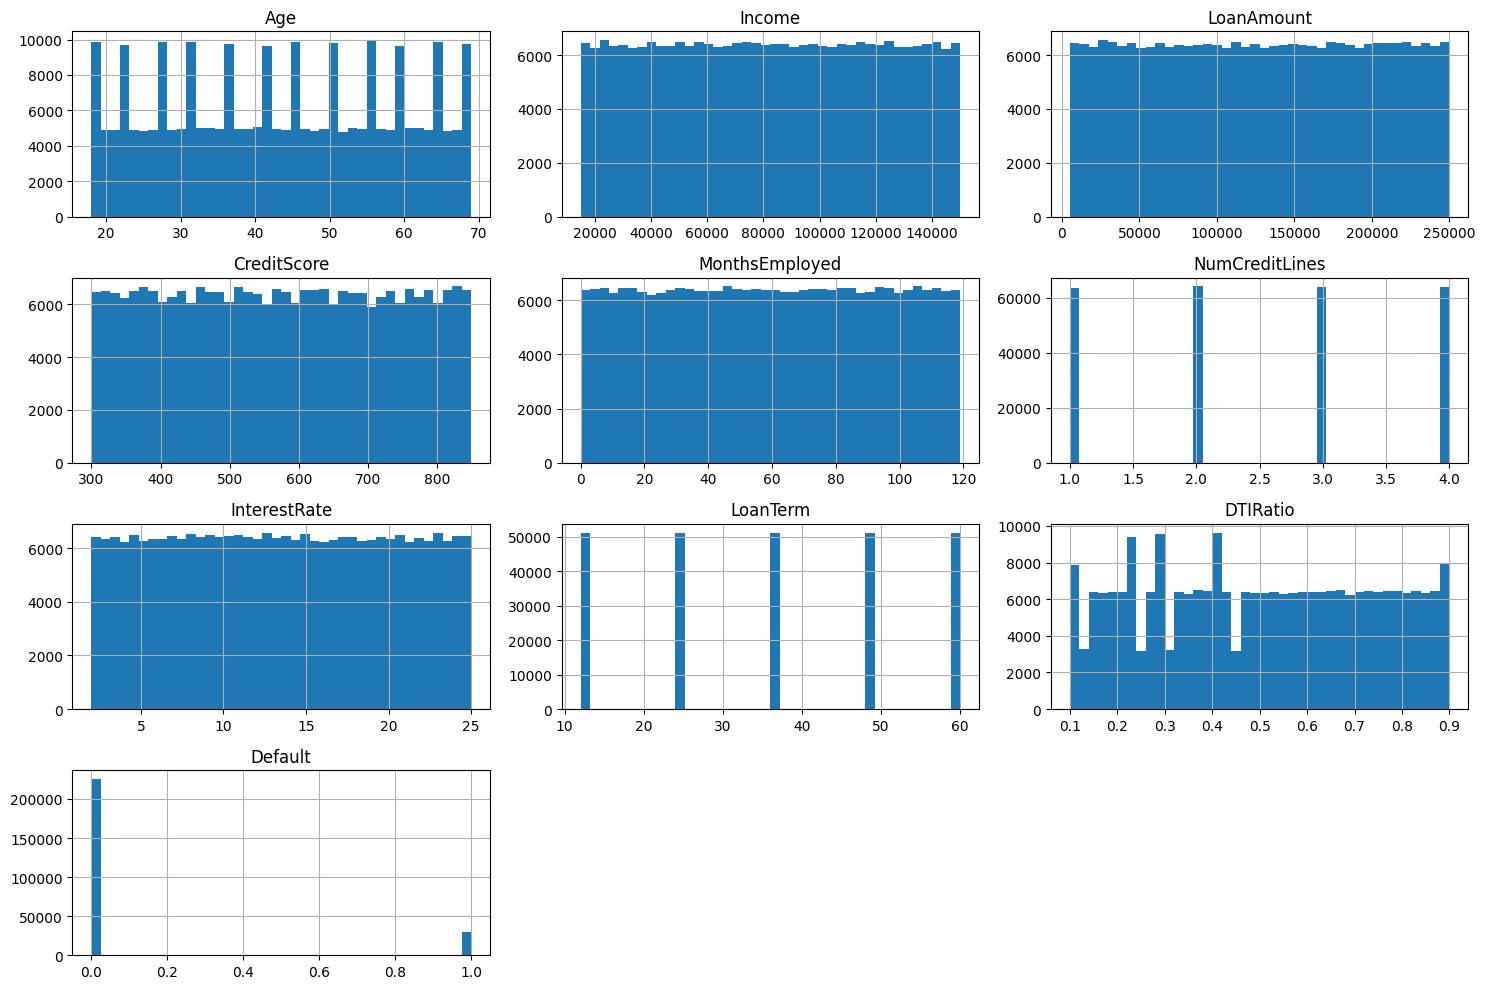

In [14]:
df.hist(bins=40, figsize=(15,10))
plt.tight_layout()
plt.show()

In [15]:
DATA_PATH = os.path.join("..", 'Data',"processed",'loan_data.csv')

In [16]:
#df.to_csv(DATA_PATH,index=False)

In [24]:
yesNoColumns

['HasMortgage', 'HasDependents', 'HasCoSigner']

In [27]:
categorical_features

['EmploymentType', 'Education', 'MaritalStatus', 'LoanPurpose']

In [26]:
yesNoColumns = ["HasMortgage","HasDependents", "HasCoSigner"]

categorical_features = list(set(df.select_dtypes(include=['object'])) - set(yesNoColumns))

numeric_features = list(set(df.columns) - set(categorical_features) - set(yesNoColumns))

In [38]:
categorical_features

['EmploymentType', 'Education', 'MaritalStatus', 'LoanPurpose']

In [32]:
yesNoColumns = ["HasMortgage","HasDependents", "HasCoSigner"]
categorical_features=list(set(df.select_dtypes(include=['object']))-set(yesNoColumns))
numeric_features=list(set(df)-set(categorical_features)-set(yesNoColumns))
numeric_features+ yesNoColumns + categorical_features==list(df.columns)

False

In [35]:
numeric_features+ yesNoColumns + categorical_features

['NumCreditLines',
 'LoanAmount',
 'Age',
 'Income',
 'InterestRate',
 'MonthsEmployed',
 'DTIRatio',
 'CreditScore',
 'LoanTerm',
 'Default',
 'HasMortgage',
 'HasDependents',
 'HasCoSigner',
 'EmploymentType',
 'Education',
 'MaritalStatus',
 'LoanPurpose']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64